In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_excel(r"C:\Users\honya\Documents\TB\20250414_ServiceLines_example.xlsx")
df.head()

,Document Type,Document No_,Line No_,Sell-to Customer No_,Type,No_,Location Code,Posting Group,Quantity Disc_ Code,Order Date,...,Priority,Virtual Record,VAT Difference Amount,Manual VAT Amount,VAT Amount,Calculated VAT Amount,Original Amount,Original Amount Incl_ VAT,Autom_ Rounding Disc_ _,Autom_ Rounding Disc_ Amount
0,1,W10-019580,10000,102613.0,3,U10350Z0,10.0,NaN,NaN,2024-09-13 00:00:00,...,0,0,0,0,0,0,0,0,0,0
1,1,W10-019580,20000,102613.0,3,15470020,10.0,NaN,NaN,2024-09-13 00:00:00,...,0,0,0,0,0,0,0,0,0,0
2,1,W10-019580,40000,102613.0,3,15465020,10.0,NaN,NaN,2024-09-13 00:00:00,...,0,0,0,0,0,0,0,0,0,0
3,1,W10-019580,45000,102613.0,3,15466020,10.0,NaN,NaN,2024-09-13 00:00:00,...,0,0,0,0,0,0,0,0,0,0
4,1,W10-019580,50000,102613.0,3,44509020,10.0,NaN,NaN,2024-09-13 00:00:00,...,0,0,0,0,0,0,0,0,0,0


This code drops the all the NaN s and the features that only have 1 values

In [64]:
one_value_cols = [col for col in df.columns if df[col].nunique(dropna=False) == 1]
all_nan_cols = df.columns[df.isna().all()].tolist()
print(f"Number of columns before dropping {df.shape[1]}")

print("Dropping one-value columns:", one_value_cols)
print("Dropping all-NaN columns:", all_nan_cols)

df = df.drop(columns=one_value_cols + all_nan_cols)
print(f"Number of columns after dropping {df.shape[1]}")

Number of columns before dropping 154
Dropping one-value columns: ['Document Type', 'Quantity Disc_ _', 'Gross Weight', 'Units per Parcel', 'Unit Volume', 'Appl_-to Item Entry', 'Price Group Code', 'Allow Quantity Disc_', 'Serial No_', 'Profit _', 'VAT Calculation Type', 'Transaction Type', 'Transport Method', 'Attached to Line No_', 'Exit Point', 'Area', 'Transaction Specification', 'Tax Area Code', 'Tax Liable', 'Tax Group Code', 'Currency Code', 'Reserved Quantity', 'System-Created Entry', 'Activity Creation', 'Option Code', 'Book No_', 'Variant Code', 'Qty_ per Unit of Measure', 'Planned', 'Reserved Qty_ (Base)', 'Appl_-from Item Entry', 'Qty_ per Hour', 'Vehicle Appointment Code', 'Next Appointment on', 'Next Appointment at Mileage', 'Additional Item', 'Quantity Multiplier', 'No Charge', 'Exch_ Parts Tax Base', 'Exch_ Parts Tax _', 'Exch_ Parts Tax Amount', 'Exch_ Parts VAT _', 'Fair Deal', 'Text Line Link', 'Surcharge Code', 'Post with Book No_', 'Sending Required', 'Suppress in 

These 2 features only had 10 and Nan values, so I slao dropped them

In [65]:
df = df.drop(columns=["Sales Branch Code", "Location Code"])

In [66]:
df.head()

,Document No_,Line No_,Sell-to Customer No_,Type,No_,Posting Group,Quantity Disc_ Code,Order Date,Description,Description 2,...,Dimension Change,Shelf_Bin No_,Line Document Status,Process Type,Req_ Worksheet Name,Disable for Requisition,VAT Identifier,Resource No_,Pickup Date,Availability
0,W10-019580,10000,102613.0,3,U10350Z0,NaN,NaN,2024-09-13 00:00:00,Diagnose uitvoeren,motorstoring,...,0,NaN,1,1,NaN,0,0.00,TB2236,2025-05-16 00:00:00,NaN
1,W10-019580,20000,102613.0,3,15470020,NaN,NaN,2024-09-13 00:00:00,DPF druk sensor vernieuwen,NaN,...,0,NaN,1,1,NaN,0,0.21,TB1722,2025-05-16 00:00:00,NaN
2,W10-019580,40000,102613.0,3,15465020,NaN,NaN,2024-09-13 00:00:00,Upstream NOX sensor vernieuwen,NaN,...,0,NaN,1,1,NaN,0,0.21,TB1722,2025-05-16 00:00:00,NaN
3,W10-019580,45000,102613.0,3,15466020,NaN,NaN,2024-09-13 00:00:00,Downstream NOX sensor vernieuwen,NaN,...,0,NaN,1,1,NaN,0,0.21,TB2236,2025-05-16 00:00:00,NaN
4,W10-019580,50000,102613.0,3,44509020,NaN,NaN,2024-09-13 00:00:00,Druksensor voor turbo vernieuwen,NaN,...,0,NaN,1,1,NaN,0,0.00,TB1722,2025-05-16 00:00:00,NaN


In [67]:
df = df.drop_duplicates()

These columns were object types, but they should be date time, so I converted them

In [68]:
date_time_features = ["Order Date", "Last Changed", "Pickup Date"]
for dtf in date_time_features:
     df[dtf] = pd.to_datetime(df[dtf], errors='coerce')

Since we still have 84 featuers, I seperated the numerical and non numerical features in 2 Excel files, so we can decide what to do with the non numerical ones

In [69]:
non_numeric_df = df.select_dtypes(exclude=['number', "datetime"])

non_numeric_df.to_excel('non_numeric_features.xlsx', index=False)

In [70]:
df["Document No_"].dtype

dtype('O')

In [71]:
numeric_df = df.select_dtypes(exclude=["O", "datetime"])

numeric_df.to_excel('numeric_features.xlsx', index=False)

Here is the correlation of the numerical features, so as you can see we have a lot of strong correlations, now we just have to decide what to do with the non numerical features

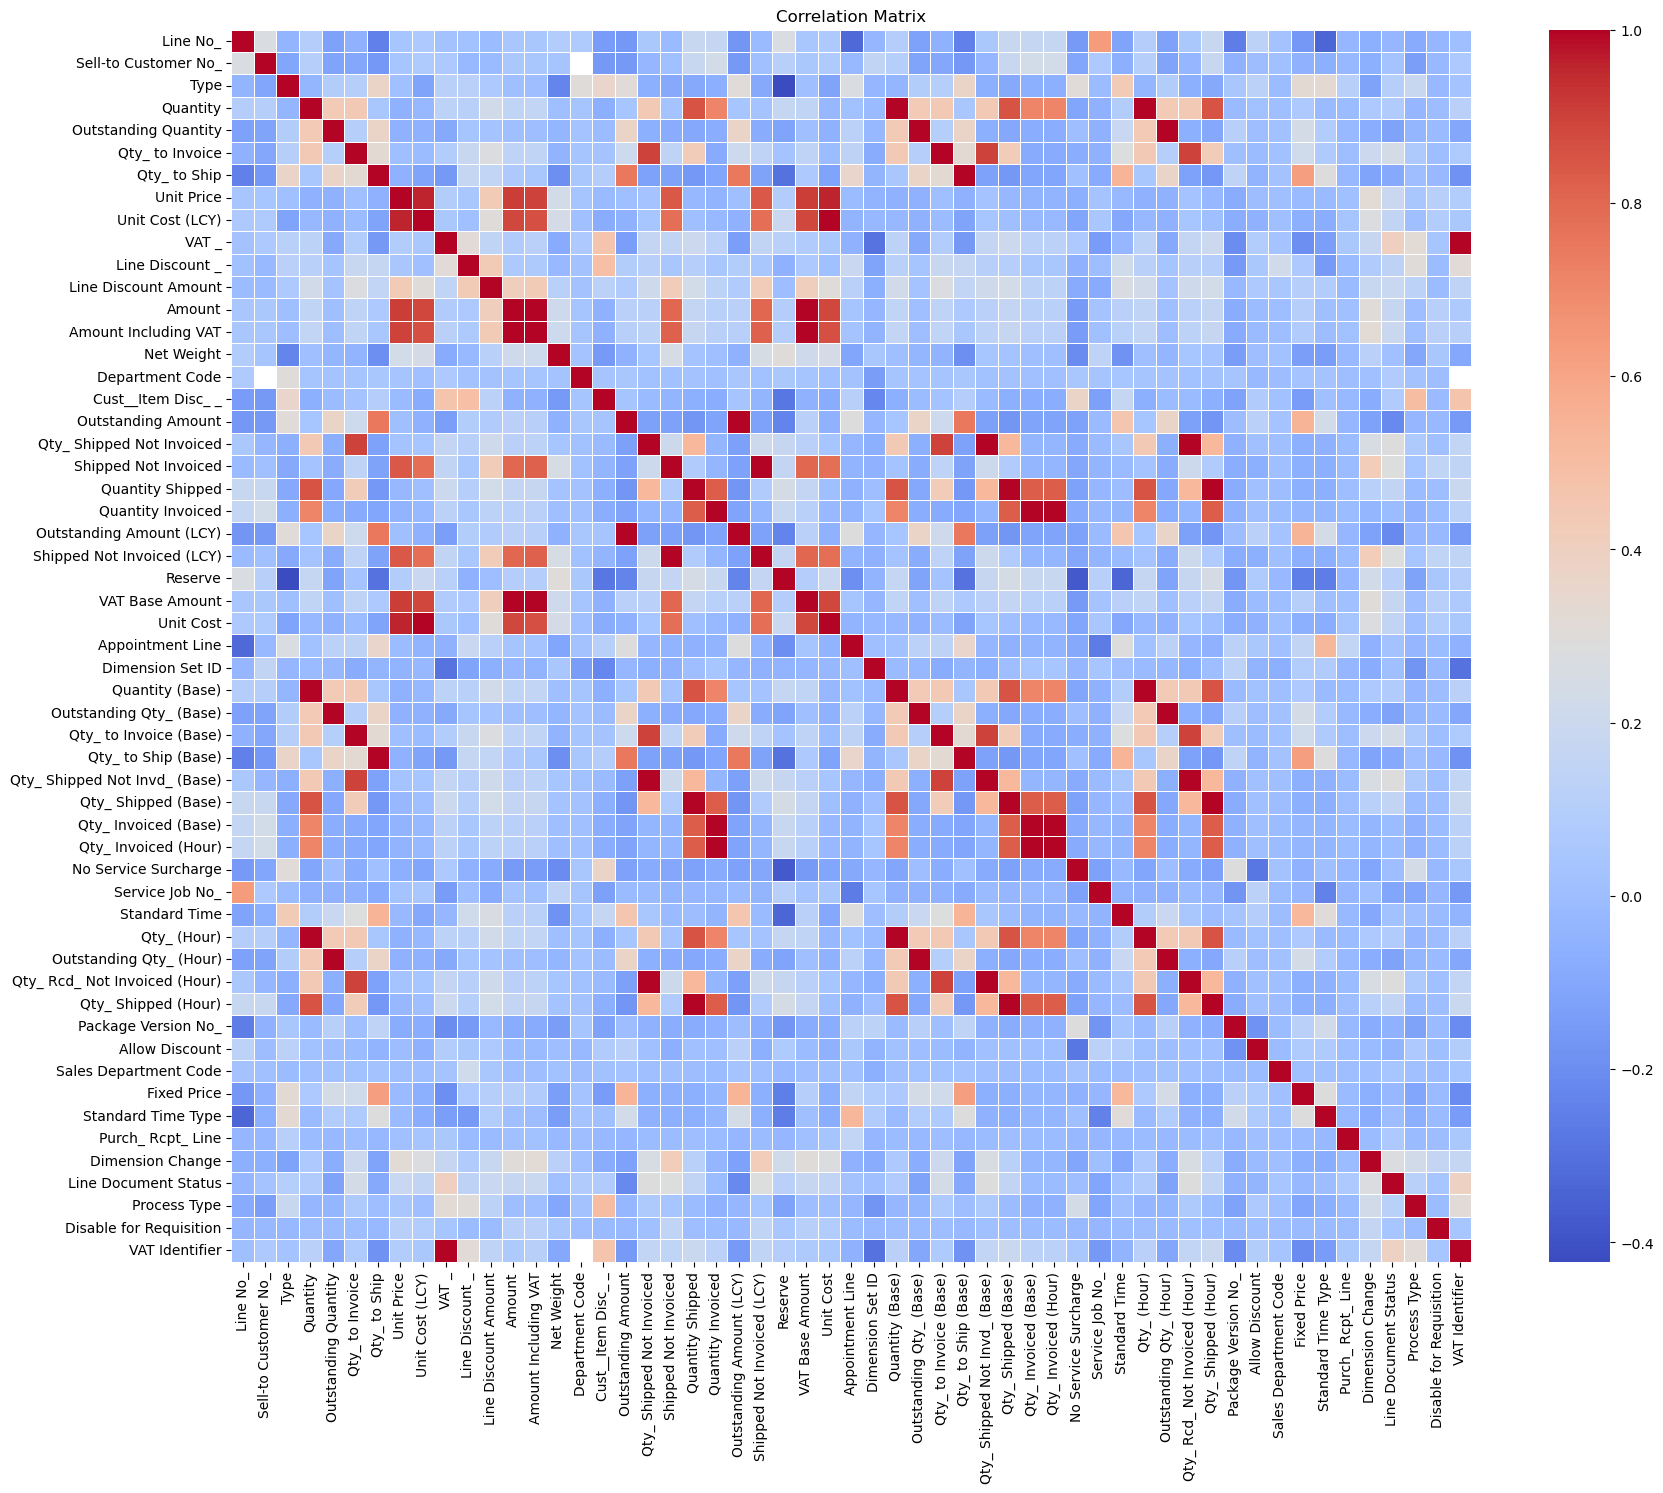

In [72]:
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 16)) 
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()